# Getting started with INTEGRATE - posterior analysis only

This notebook contains a simple example of getting started with INTEGRATE - analyzing the posterior only.

1. Load the the results of inversion
2. Plot some results

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # #%load_ext autoreload
    # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True 
import matplotlib.pyplot as plt

Notebook detected. Parallel processing is OK


## 0. Get some TTEM data
A number of test cases are available in the INTEGRATE package
To see which cases are available, check the `get_case_data` function

The code below will download the file DAUGAARD_AVG.h5 that contains 
a number of TTEM soundings from DAUGAARD, Denmark.
It will also download the corresponding GEX file, TX07_20231016_2x4_RC20-33.gex, 
that contains information about the TTEM system used.


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case,  loadType='post')
f_data_h5 = files[0]
f_post_h5 = files[-1]
f_prior_h5 = files[3]
file_gex= ig.get_gex_file_from_data(f_data_h5)
    

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)
print("Using prior in file: %s" % f_prior_h5)
print("Using posterior in file: %s" % f_post_h5)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex
Using prior in file: prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
Using posterior in file: POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1.h5


### Plot the geometry and the data
ig.plot_geometry plots the geometry of the data, i.e. the locations of the soundings.
ig.plot_data plots the data, i.e. the measured data for each sounding.

f_data_h5=DAUGAARD_AVG.h5


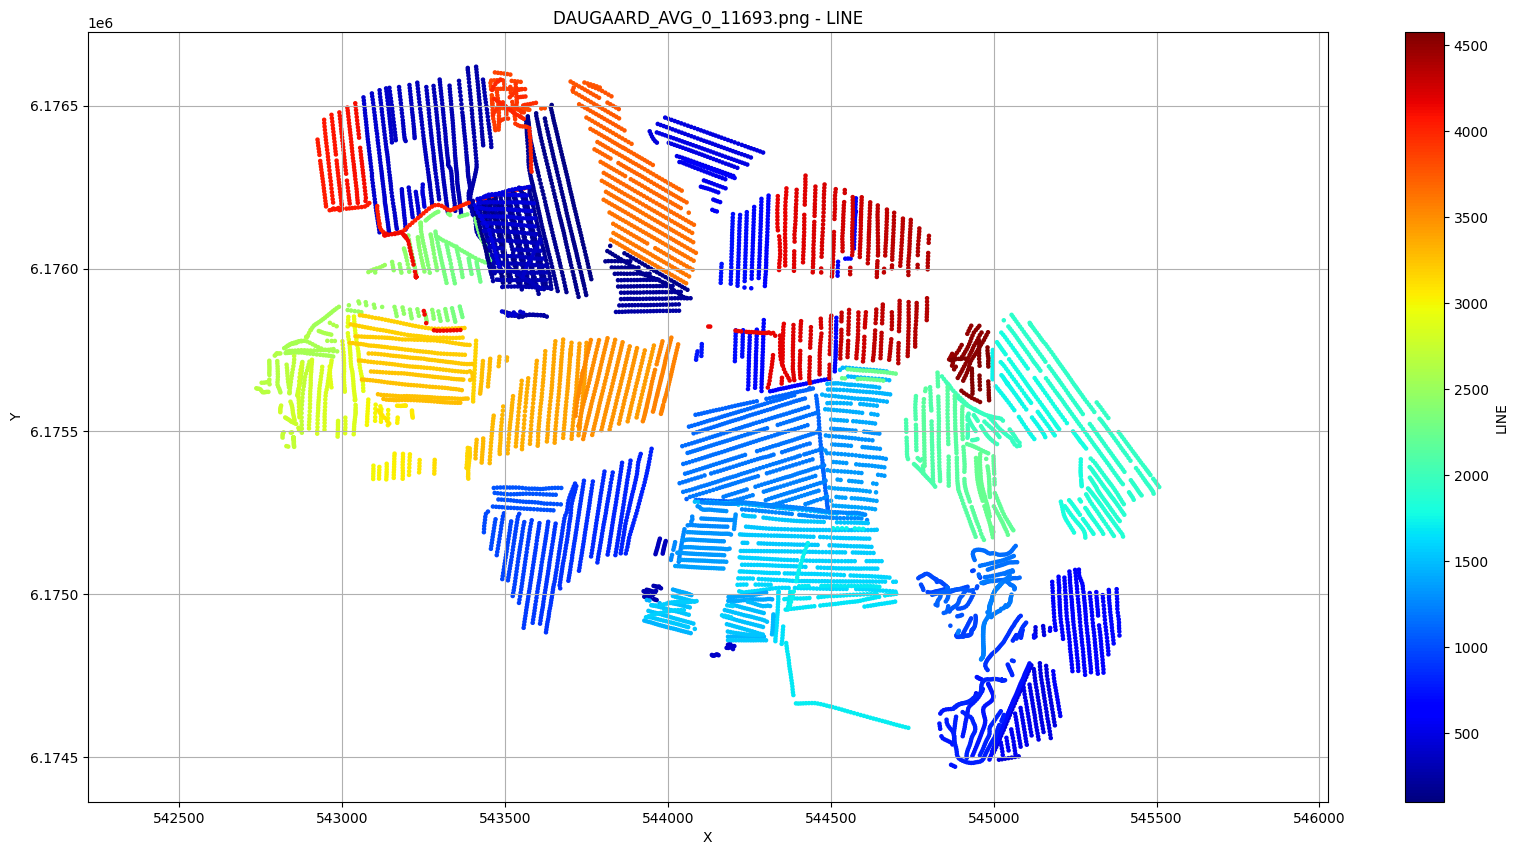

f_data_h5=DAUGAARD_AVG.h5


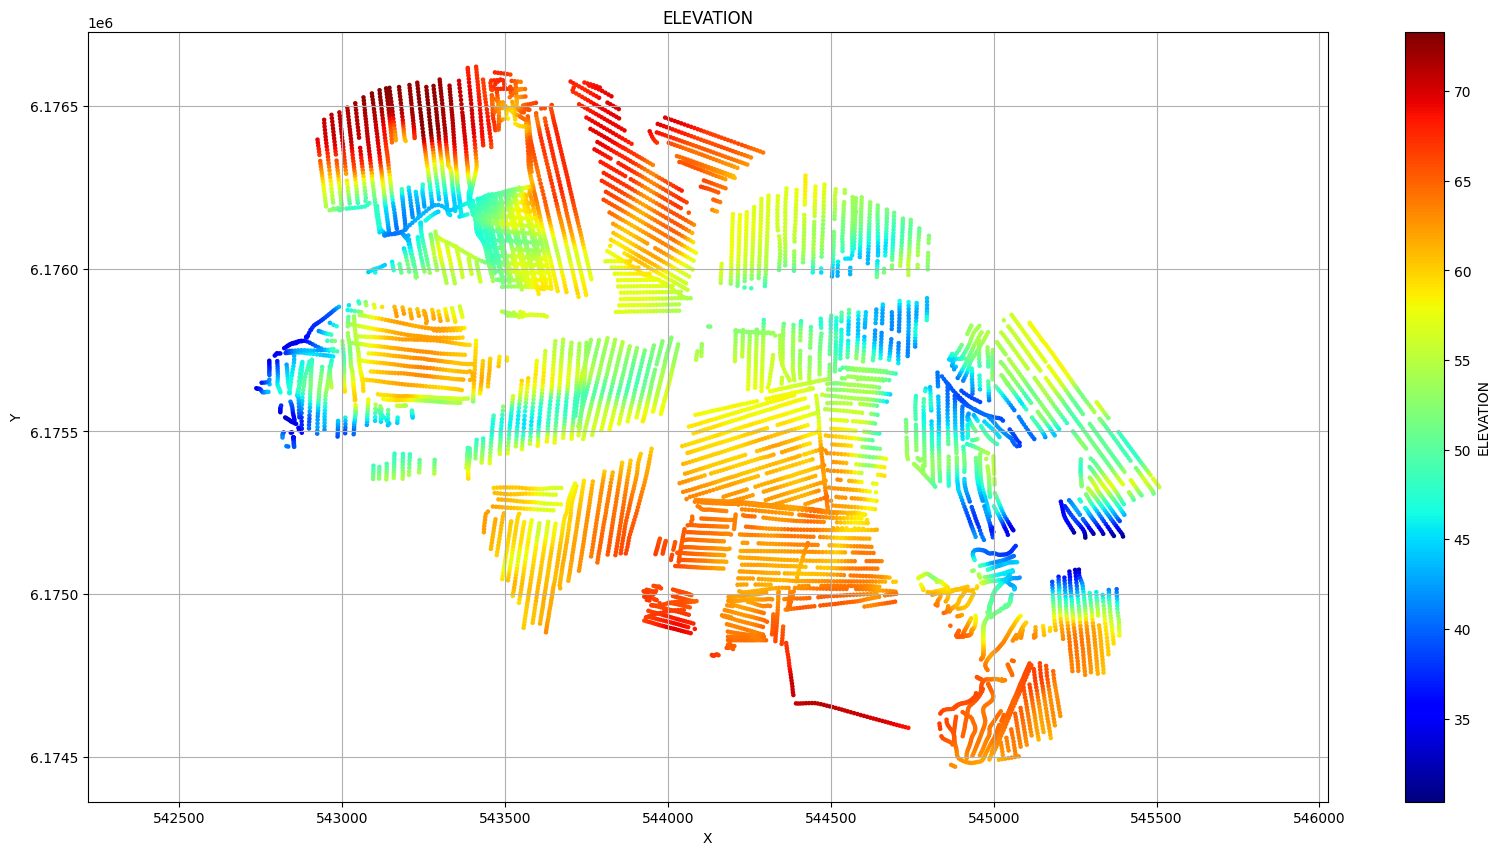

f_data_h5=DAUGAARD_AVG.h5


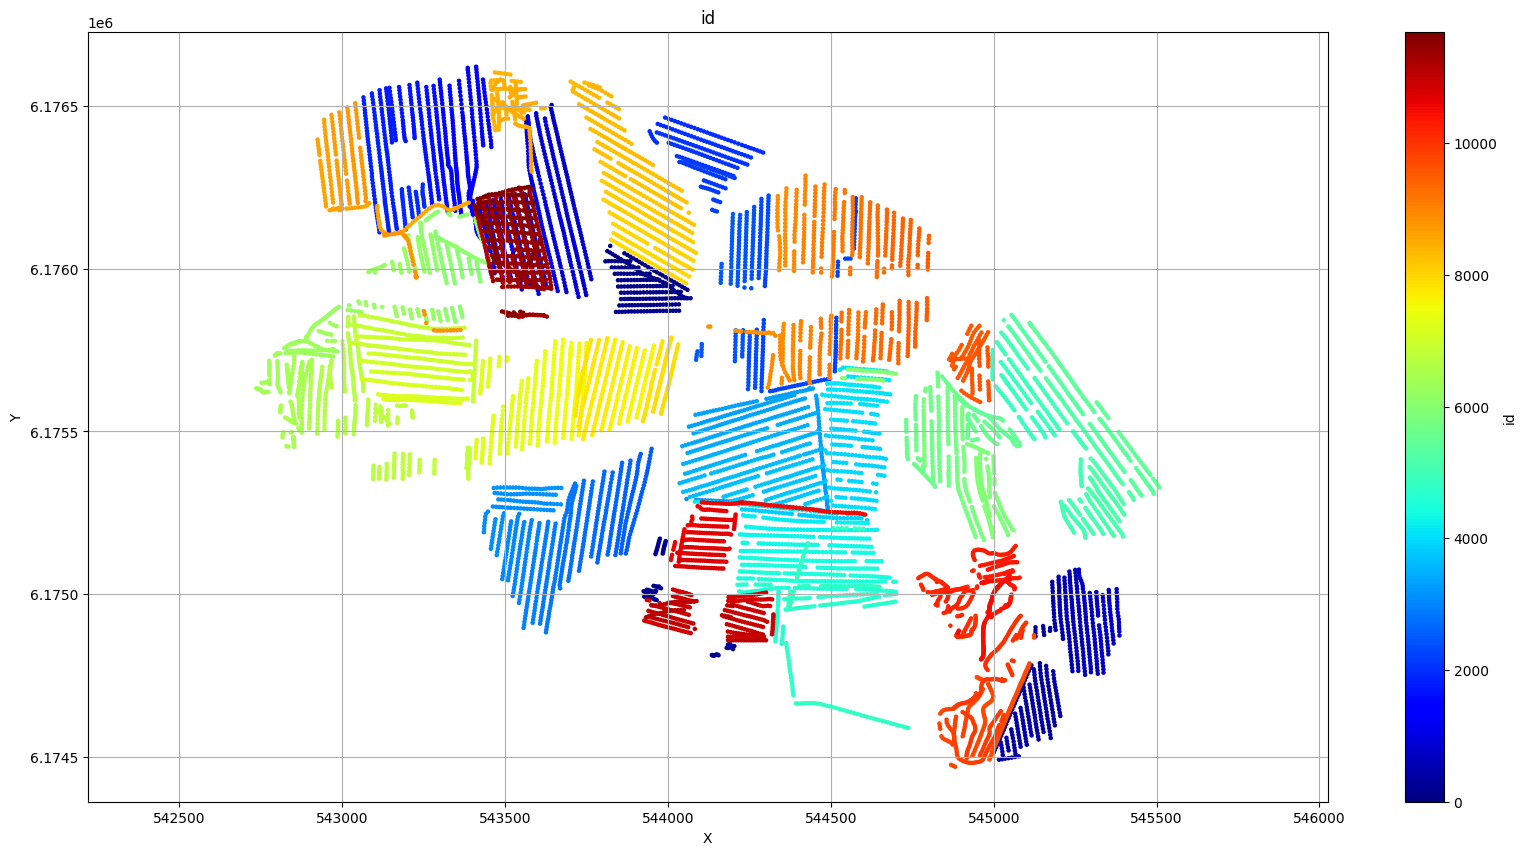

In [4]:
# The next line plots LINE, ELEVATION and data id, as three scatter plots
# ig.plot_geometry(f_data_h5)
# Each of these plots can be plotted separately by specifying the pl argument
ig.plot_geometry(f_data_h5, pl='LINE')
ig.plot_geometry(f_data_h5, pl='ELEVATION')
ig.plot_geometry(f_data_h5, pl='id')

plot_data: Found data set D1
plot_data: Using data set D1


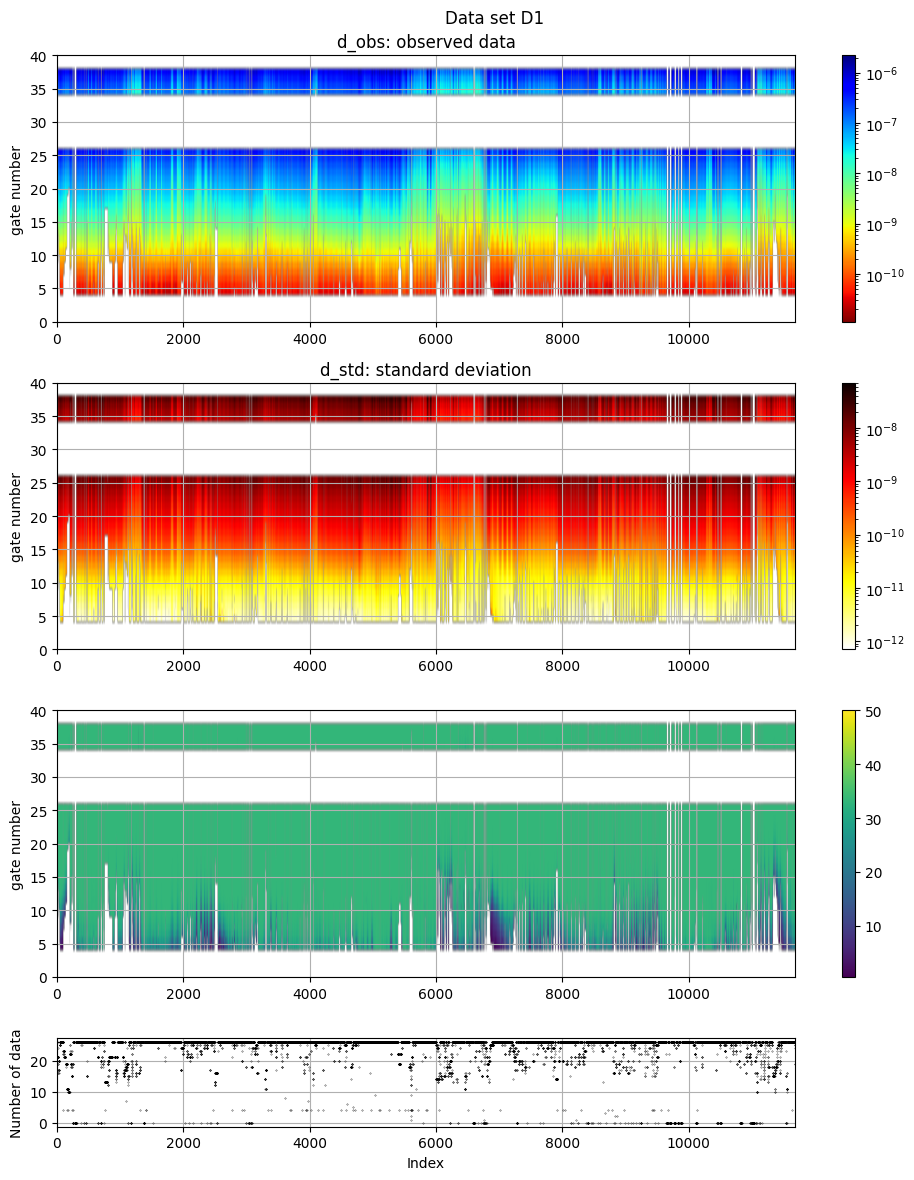

In [5]:
# The data, d_obs and d_std, can be plotted using ig.plot_data
ig.plot_data(f_data_h5, hardcopy=hardcopy)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d}))

In this case prior data and models are allready available in the HDF% in 'f_prior_h5'.

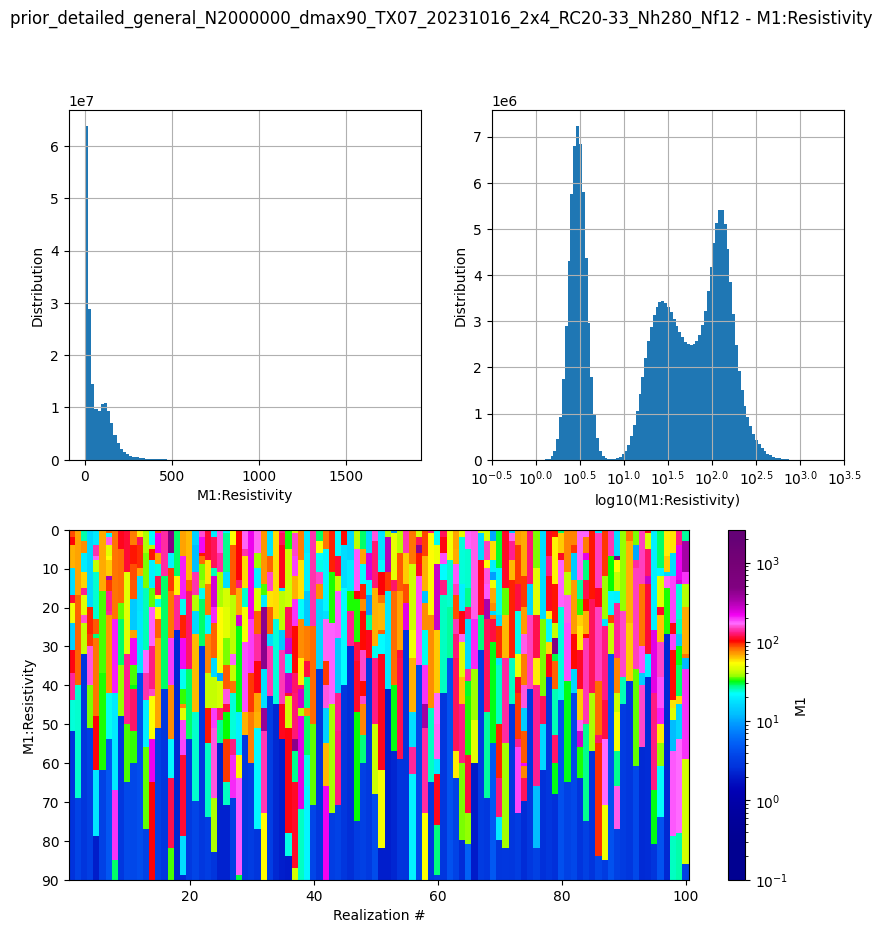

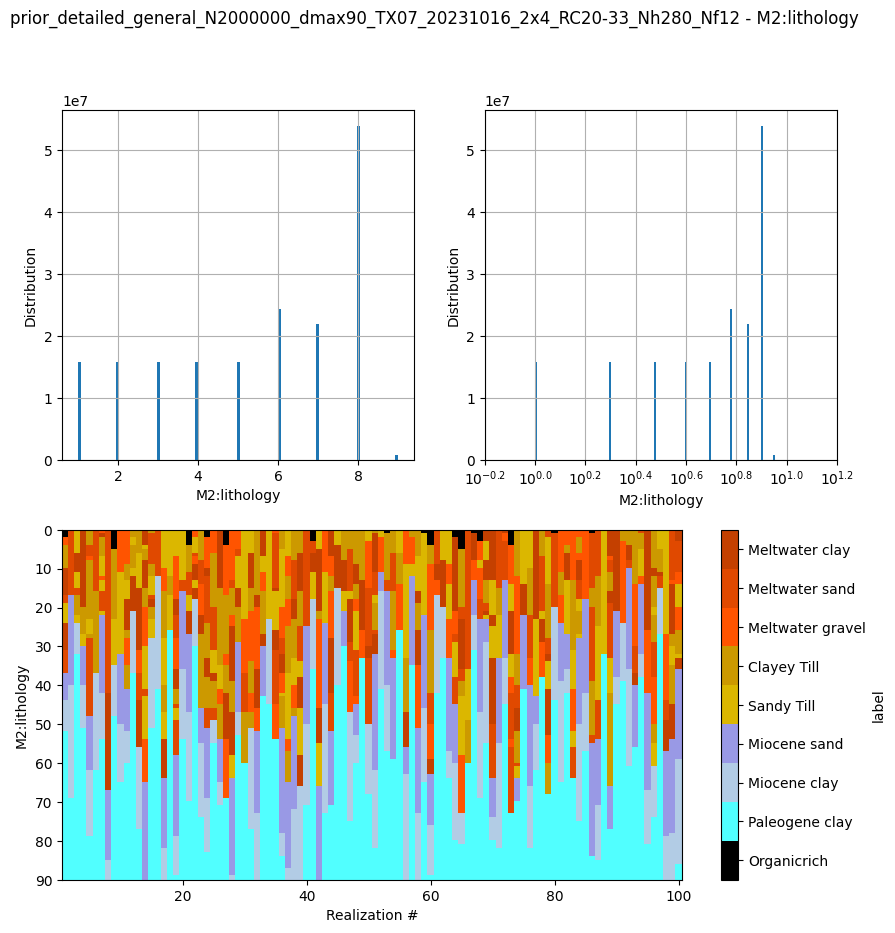

In [6]:
# Plot some summary statistics of the prior model, to QC the prior choice
ig.plot_prior_stats(f_prior_h5, hardcopy=hardcopy)

It can be useful to compare the prior data to the observed data before inversion. If there is little to no overlap of the observed data with the prior data, there is little chance that the inversion will go well. This would be an indication of inconsistency.
In the figure below, one can see that the observed data (red) is clearly within the space of the prior data.

id_data = 1


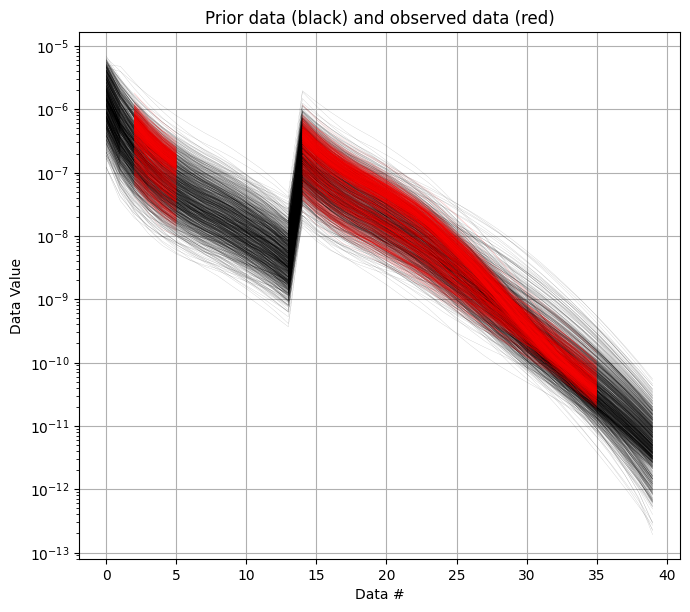

True

In [7]:
ig.plot_data_prior(f_prior_h5,f_data_h5,nr=1000,hardcopy=hardcopy)

## 2. Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution has allready been sampled using the extended rejection sampler.

## 3. Plot some statistics from $\sigma(\mathbf{m})$

### Prior and posterior data
First, compare prior (beige) to posterior (black) data, as well as observed data (red), for two specific data IDs.

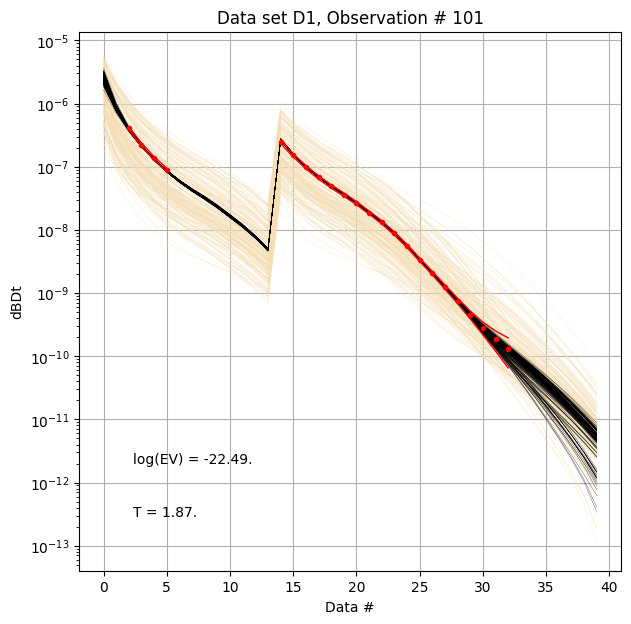

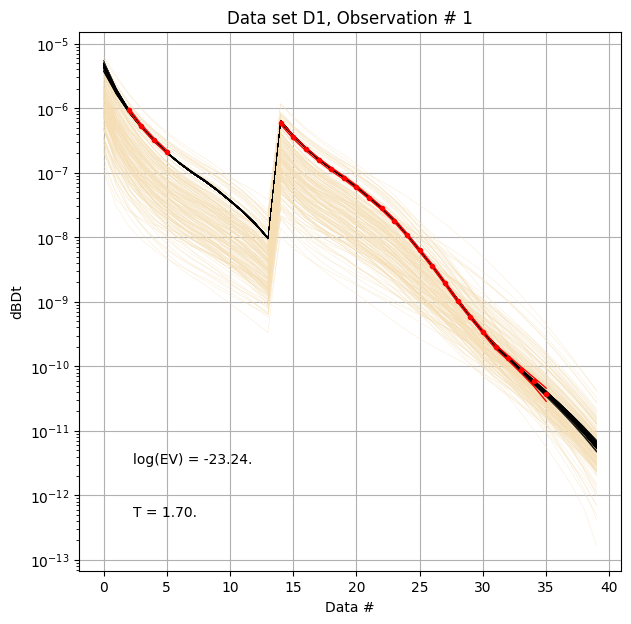

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=100,hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0,hardcopy=hardcopy)

### Evidence and Temperature

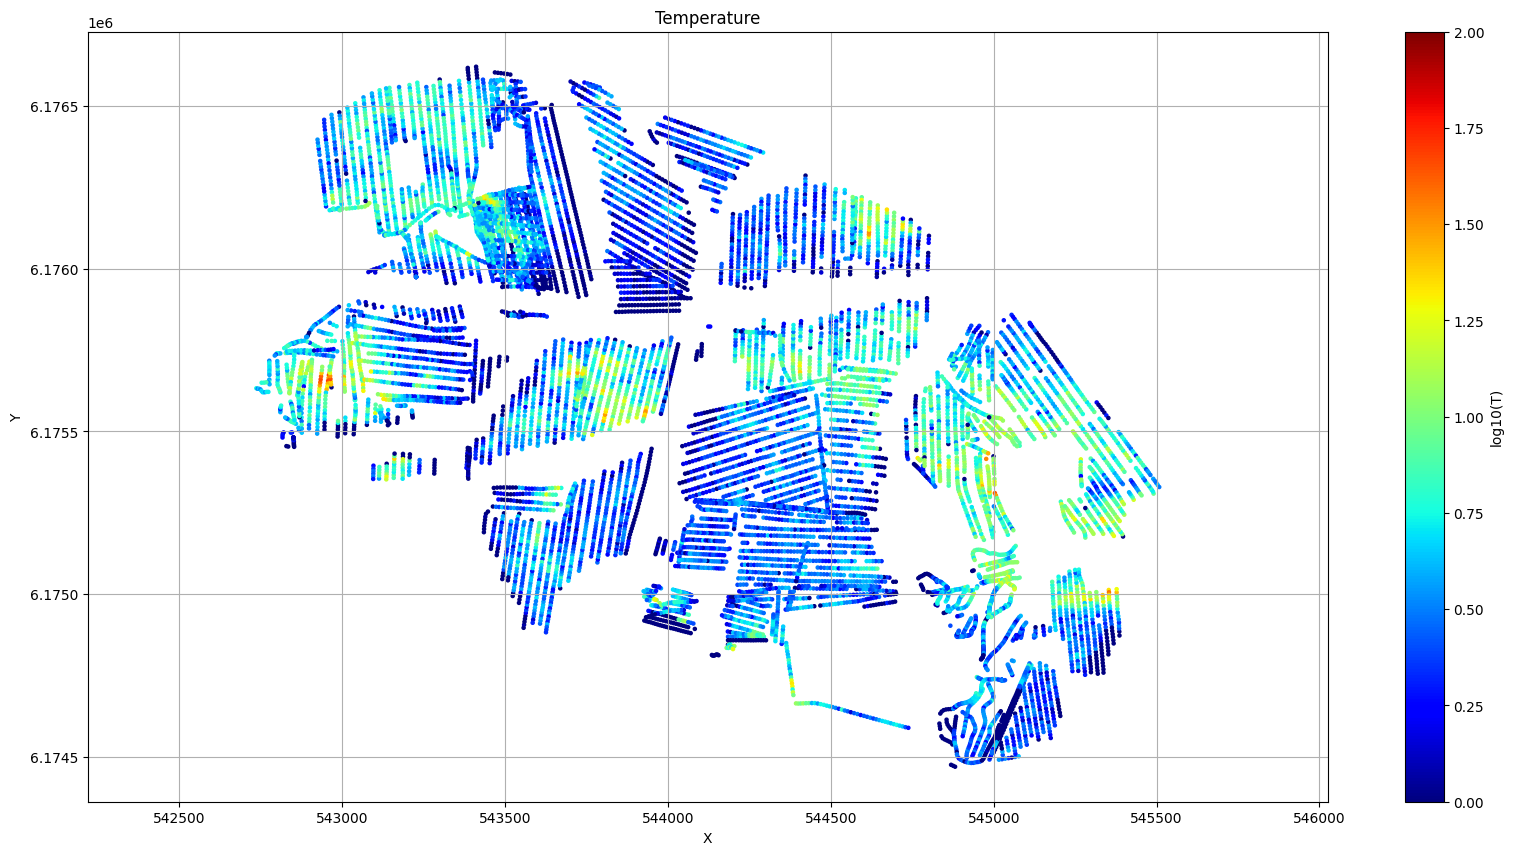

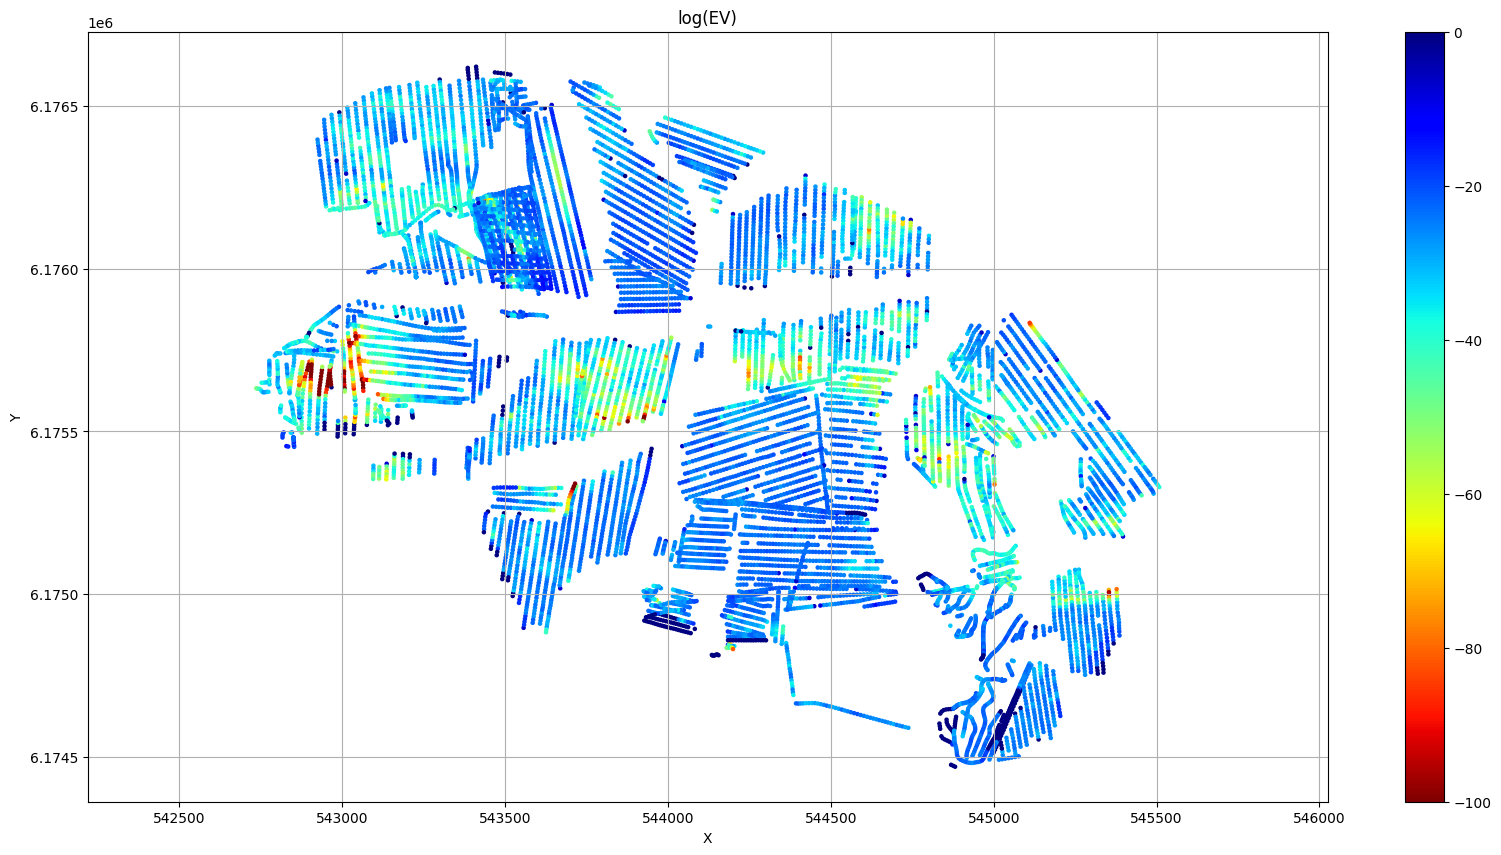

In [9]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T',hardcopy=hardcopy)
# Plot the evidence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV',hardcopy=hardcopy)

### Profile

Plot a profile of posterior statistics of model parameters 1 (resistivity)

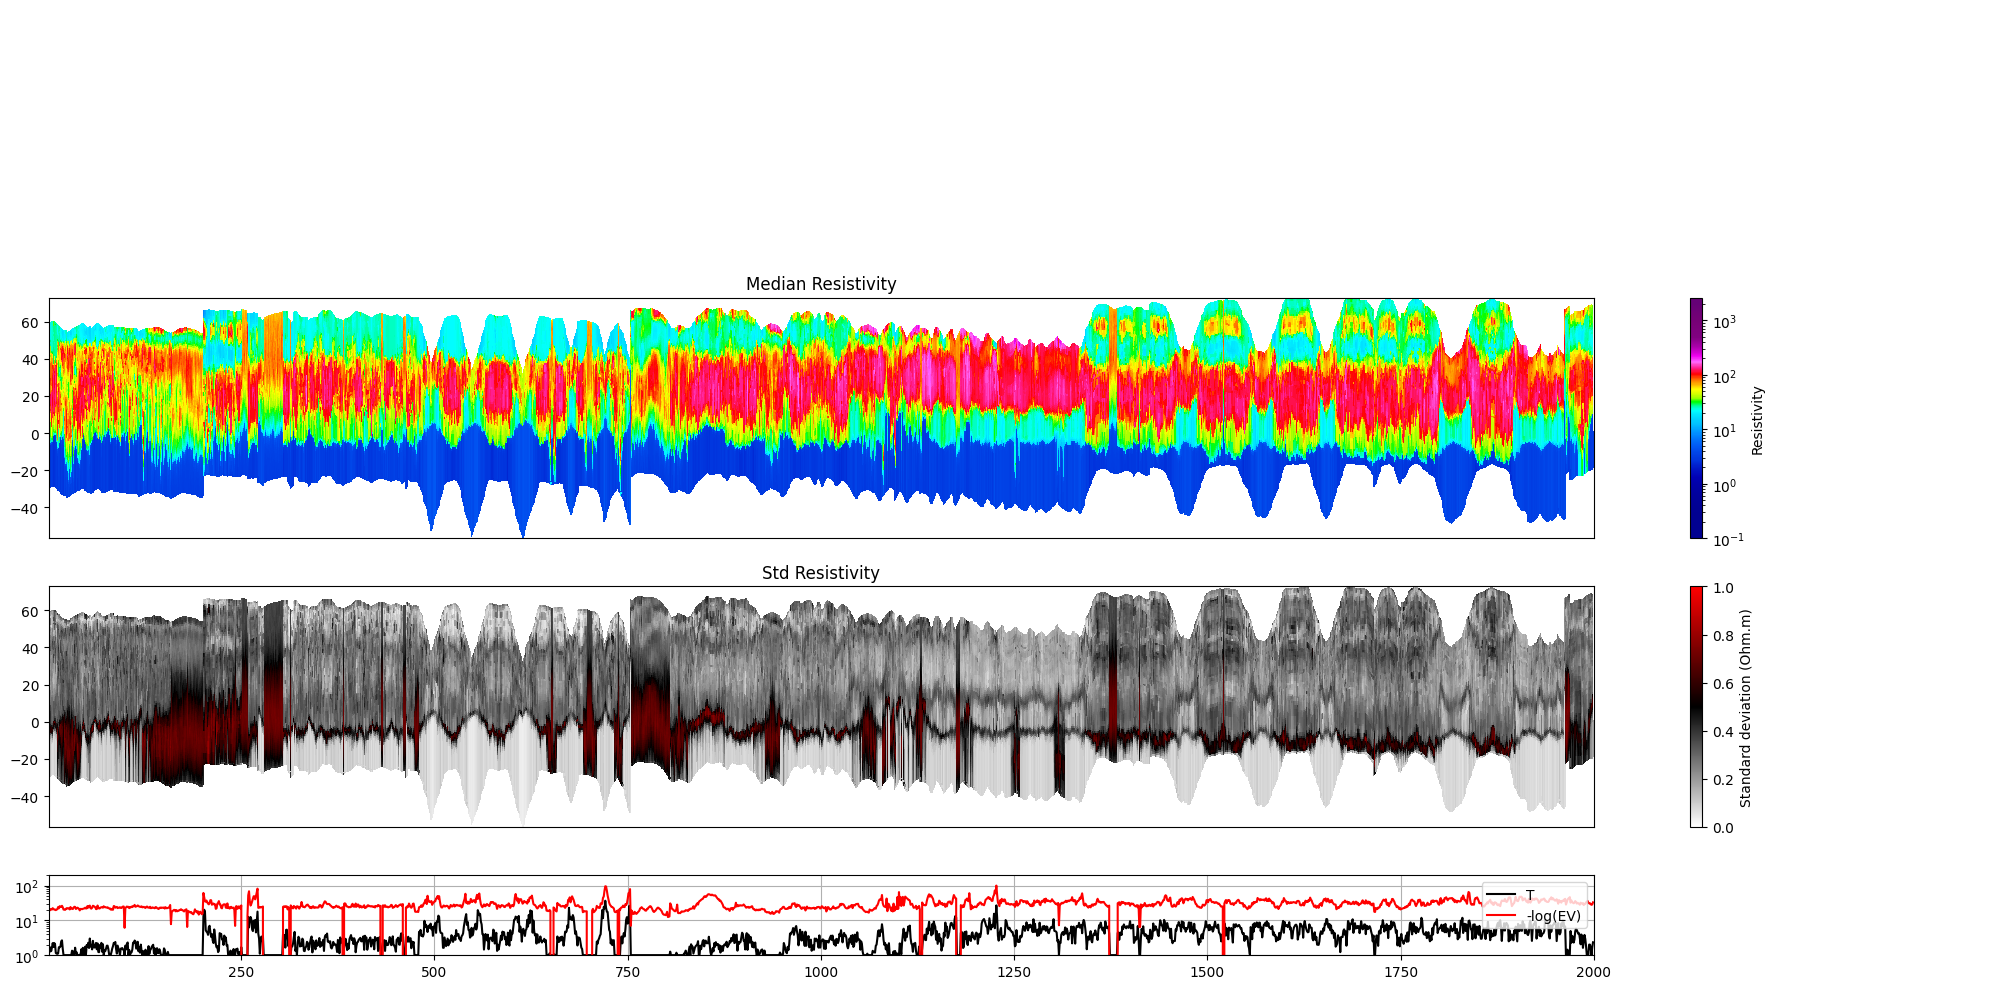

In [10]:
ig.plot_profile(f_post_h5, i1=1, i2=2000, im=1, hardcopy=hardcopy)

### Plot 2d Features

First plot the median resistivity in layers 5, 30, and 50

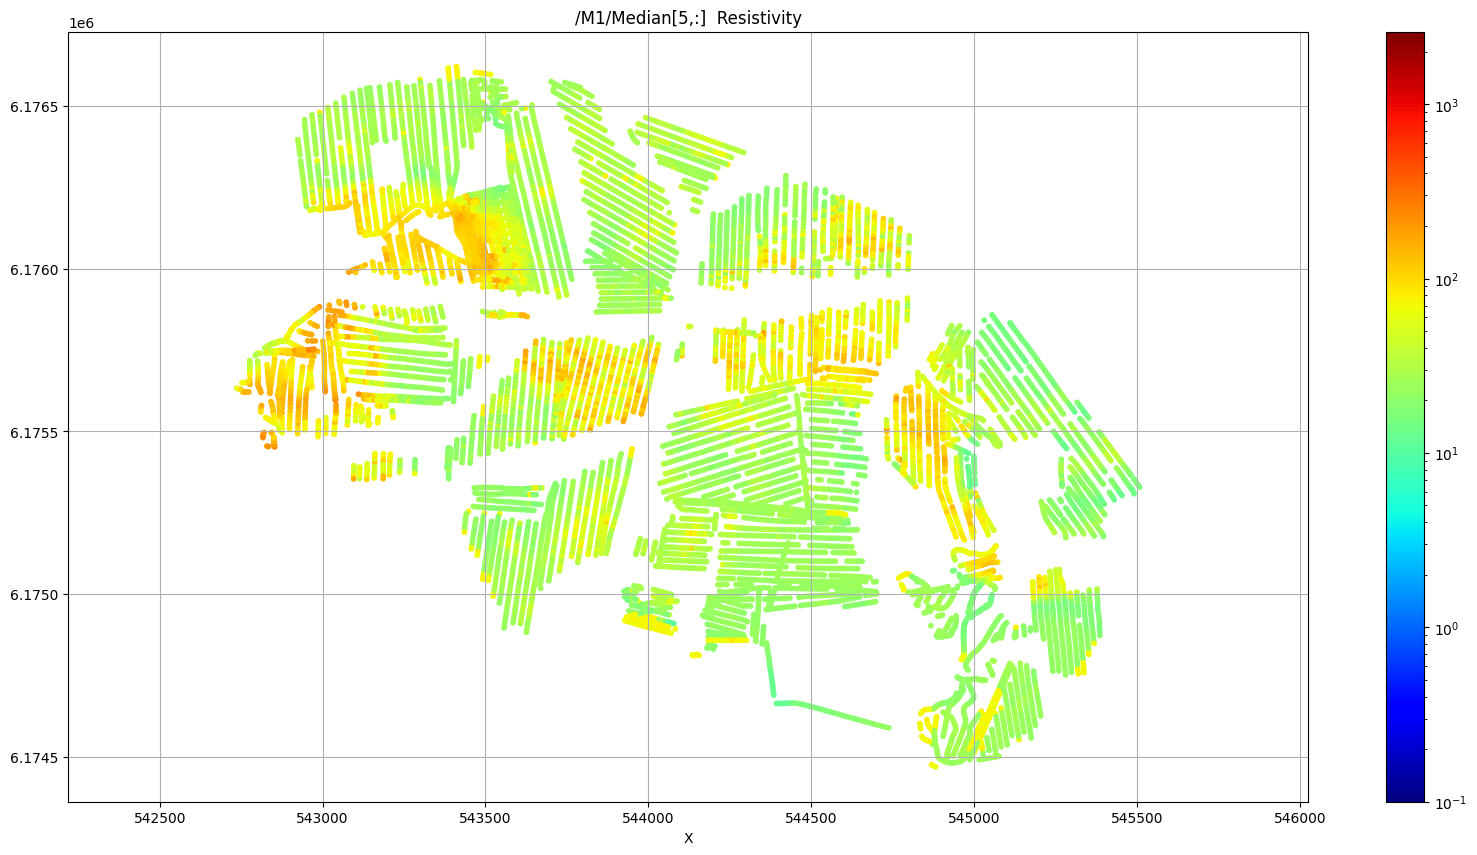

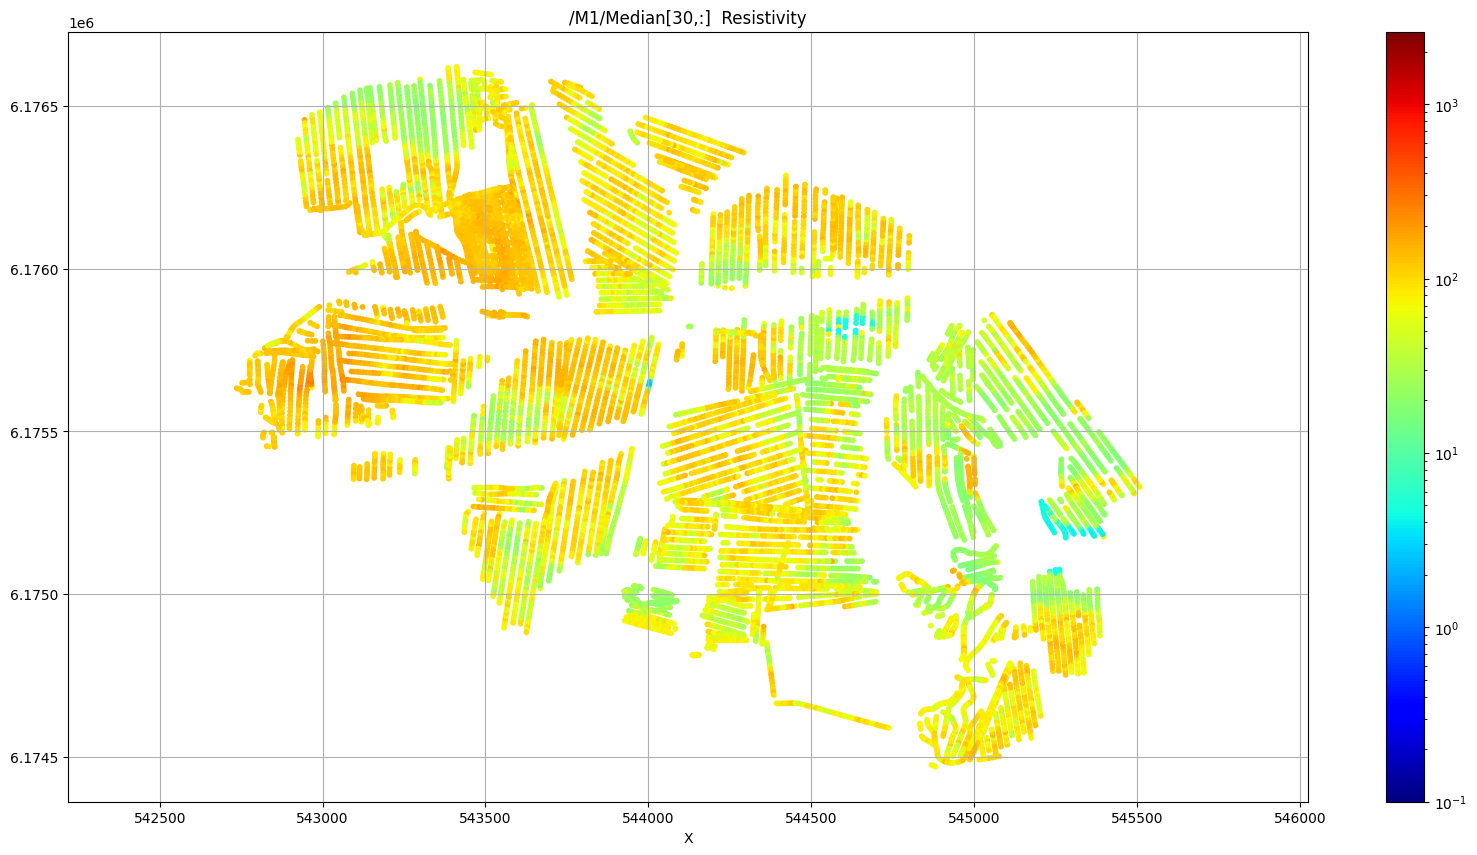

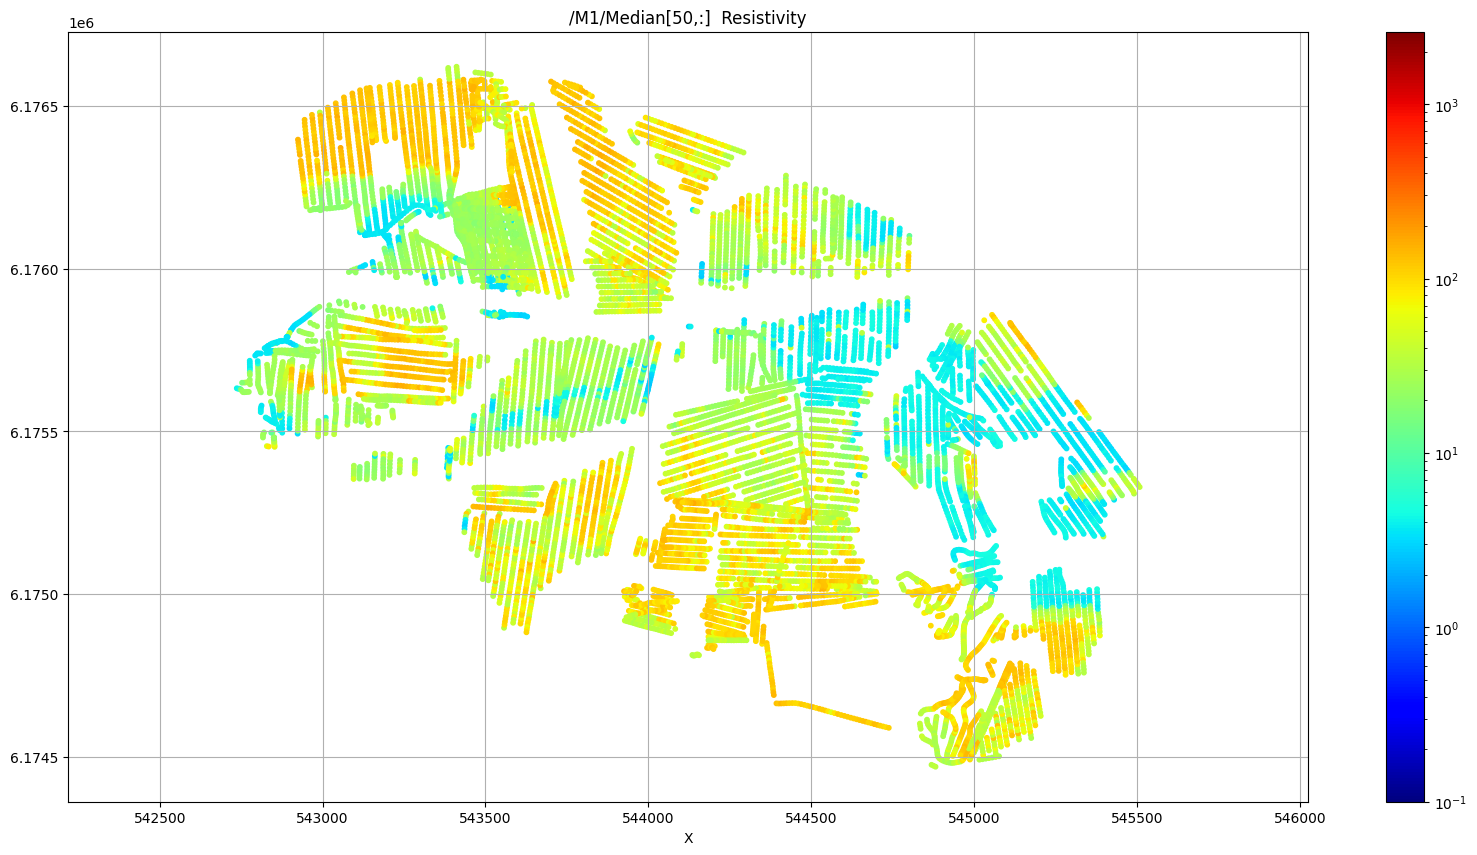

In [11]:

# Plot a 2D feature: Resistivity in layer 10
try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=30, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=50, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

## Export to CSV format

In [12]:
f_csv, f_point_csv = ig.post_to_csv(f_post_h5)

Writing to POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1_M1.csv


----------------------------------------------------
Creating point data set: Median


Creating point data set: Mean


Creating point data set: Std


- saving to : POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu2000000_aT1_M1_point.csv


In [13]:
# Read the CSV file
#f_point_csv = 'POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N100000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1_M1_point.csv'
import pandas as pd
df = pd.read_csv(f_point_csv)
df.head()

X          Y      Z   LINE     Median       Mean       Std
0  543822.9  6176069.6  58.32  140.0  18.622543  24.517012  0.340569
1  543822.9  6176069.6  57.32  140.0  18.622543  19.759150  0.219507
2  543822.9  6176069.6  56.32  140.0  18.241245  17.422058  0.054911
3  543822.9  6176069.6  55.32  140.0  18.622543  17.760700  0.062353
4  543822.9  6176069.6  54.32  140.0  18.360731  17.566660  0.063685

In [14]:
# Use Pyvista to plot X,Y,Z,Median
plPyVista = False
if plPyVista:
    import pyvista as pv
    import numpy as np
    from pyvista import examples
    #pv.set_jupyter_backend('client')
    pv.set_plot_theme("document")
    p = pv.Plotter(notebook=True)
    p = pv.Plotter()
    filtered_df = df[(df['Median'] < 50) | (df['Median'] > 200)]
    #filtered_df = df[(df['LINE'] > 1000) & (df['LINE'] < 1400) ]
    points = filtered_df[['X', 'Y', 'Z']].values[:]
    median = np.log10(filtered_df['Mean'].values[:])
    opacity = np.where(filtered_df['Median'].values[:] < 100, 0.5, 1.0)
    #p.add_points(points, render_points_as_spheres=True, point_size=3, scalars=median, cmap='jet', opacity=opacity)
    p.add_points(points, render_points_as_spheres=True, point_size=6, scalars=median, cmap='hot')
    p.show_grid()
    p.show()